In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
print(tf.__version__)

2.1.0


## Tensors

In [3]:
a = tf.constant("Hello ")
b = tf.constant("World!")

In [4]:
type(a)

tensorflow.python.framework.ops.Tensor

In [5]:
print(a)

Tensor("Const:0", shape=(), dtype=string)


In [6]:
with tf.Session() as sess:
    ab = sess.run(a+b)

ab

b'Hello World!'

In [7]:
a + b

<tf.Tensor 'add_1:0' shape=() dtype=string>

In [8]:
type(a+b)

tensorflow.python.framework.ops.Tensor

In [9]:
type(ab)

bytes

In [10]:
x = tf.constant(10)
y = tf.constant(20)

with tf.Session() as sess:
    num = sess.run(x+y)

num

30

## Matrices

In [11]:
fill_mat = tf.fill((4, 4), 10)
fill_mat

<tf.Tensor 'Fill:0' shape=(4, 4) dtype=int32>

In [12]:
my_zeros = tf.zeros((4, 4))
my_zeros

<tf.Tensor 'zeros:0' shape=(4, 4) dtype=float32>

In [13]:
my_ones = tf.ones((4, 4))
my_ones

<tf.Tensor 'ones:0' shape=(4, 4) dtype=float32>

In [14]:
my_randn = tf.random_normal((4, 4), mean=0, stddev=1)
my_randn

<tf.Tensor 'random_normal:0' shape=(4, 4) dtype=float32>

In [15]:
my_randu = tf.random_uniform((4, 4), minval=0, maxval=1)
my_randu

<tf.Tensor 'random_uniform:0' shape=(4, 4) dtype=float32>

In [16]:
matrices = [fill_mat, my_zeros, my_ones, my_randn, my_randu]
with tf.Session() as sess:
    for matrix in matrices:
        print(sess.run(matrix), end='\n\n')

[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

[[ 0.47439775 -0.4058101   0.6788152   0.12168979]
 [ 0.00961587  1.0669624  -1.5080503   0.621505  ]
 [ 0.63679045 -0.86044174 -0.28593498 -0.5638193 ]
 [ 0.78093827  1.088256   -3.4343815  -0.47194457]]

[[0.9521899  0.11571133 0.97276497 0.8465171 ]
 [0.50389075 0.9509487  0.41958308 0.12067425]
 [0.5192795  0.16419089 0.09242737 0.9113871 ]
 [0.4030764  0.03327119 0.0866977  0.44482732]]



## InteractiveSession

In [17]:
m = tf.constant([[1, 2], [3, 4]])
m.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [18]:
n = tf.constant([[10], [100]])
n.get_shape()

TensorShape([Dimension(2), Dimension(1)])

In [19]:
result = tf.matmul(m, n)
result

<tf.Tensor 'MatMul:0' shape=(2, 1) dtype=int32>

In [20]:
# using InteractiveSession, session can be called from anywhere
session = tf.InteractiveSession()

In [21]:
session.run(result)

array([[210],
       [430]])

In [22]:
# equivalent to session.run(result)
result.eval()

array([[210],
       [430]])

## Graph

In [23]:
print(tf.get_default_graph())

In [24]:
graph_ori = tf.get_default_graph()
graph_ori

In [25]:
graph_second = tf.Graph()
graph_second

In [26]:
with graph_second.as_default():
    print(graph_second is tf.get_default_graph())

True


In [27]:
print(graph_second is tf.get_default_graph())

False


## Variables & Placeholders

In [28]:
my_tensor = tf.random_uniform((4, 4), minval=0, maxval=1)
my_tensor

<tf.Tensor 'random_uniform_1:0' shape=(4, 4) dtype=float32>

In [29]:
my_var = tf.Variable(initial_value=my_tensor)
my_var

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32_ref>

In [30]:
# for initializing variables
init = tf.global_variables_initializer()

In [31]:
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(my_var))

[[0.79728127 0.7047727  0.45760953 0.15946436]
 [0.7859838  0.02083683 0.5191344  0.4004612 ]
 [0.38900518 0.28882718 0.5741836  0.50394607]
 [0.12569833 0.17853391 0.14837968 0.00464451]]


In [32]:
my_ph = tf.placeholder(tf.float32, shape=(None, 3))
my_ph

<tf.Tensor 'Placeholder:0' shape=(?, 3) dtype=float32>

## Simple Neural Network

In [33]:
n_features = 10
n_dense_neurons = 3

In [34]:
x = tf.placeholder(tf.float32, (None, n_features))
x

<tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float32>

In [35]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

In [36]:
xW = tf.matmul(x, W)
z = tf.add(xW, b)

In [37]:
a = tf.sigmoid(z)
a

<tf.Tensor 'Sigmoid:0' shape=(?, 3) dtype=float32>

In [38]:
init = tf.global_variables_initializer()

In [39]:
np.random.random([1, n_features])

array([[0.57338075, 0.67702256, 0.84397986, 0.74075277, 0.68697281,
        0.30590224, 0.94224771, 0.14399889, 0.12947841, 0.51766385]])

In [40]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x:np.random.random([1, n_features])})
    W_var, b_var = sess.run([W, b])

print('Layer Output:', layer_out, end='\n\n')
print('W:', W_var, end='\n\n')
print('b:', b_var)

Layer Output: [[0.9731706  0.25569257 0.34007895]]

W: [[ 0.632389   -0.3700951  -0.9995069 ]
 [ 0.00842225  2.243087    1.6217493 ]
 [ 1.3617216  -1.0393635  -1.2935131 ]
 [ 0.46096474  0.09354579 -0.1039722 ]
 [-0.28589985 -0.4493898   0.3164834 ]
 [ 1.354111    0.18388906  0.78242344]
 [-0.03499292 -1.4697933  -2.2464342 ]
 [ 0.6854706  -2.367286    0.11846804]
 [ 1.1564901   0.1354943  -1.4138904 ]
 [ 2.0610454  -0.5236195   0.24242695]]

b: [1. 1. 1.]


+ The result above is a single process & not an iteractive process (i.e., values are not updated...), since it lacks a cost function & an optimizer to minimize it.

## Simple Regression Example

In [41]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
x_data

array([-0.90493677, -0.09052686,  1.77854124,  3.45197369,  3.47813135,
        4.7638773 ,  6.58584413,  7.06120485,  7.455168  , 11.42818568])

In [42]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
y_label

array([1.12113302, 0.79577466, 2.32604224, 3.34827185, 5.36675513,
       4.4594637 , 5.95070203, 6.61098572, 7.97802417, 9.10262865])

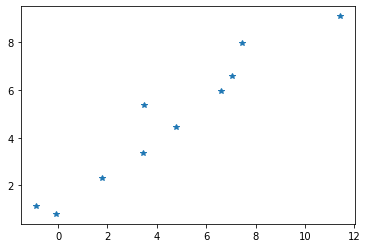

In [43]:
plt.plot(x_data, y_label, '*')

In [44]:
a = np.random.rand(2)
a

array([0.60255622, 0.53529578])

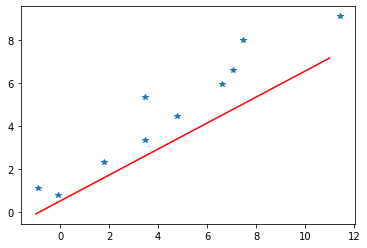

In [45]:
# initially
x_test = np.linspace(-1, 11, 10)
y_pred = a[0]*x_test + a[1]

plt.plot(x_data, y_label, '*')
plt.plot(x_test, y_pred, 'r')

In [46]:
m = tf.Variable(a[0])
b = tf.Variable(a[1])

In [47]:
error = 0
for x, y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y - y_hat)**2

In [48]:
error

<tf.Tensor 'add_24:0' shape=() dtype=float64>

In [49]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [50]:
init = tf.global_variables_initializer()

In [51]:
with tf.Session() as sess:
    sess.run(init)

    training_steps = 100
    for i in range(training_steps):
        sess.run(train)

    final_slope, final_intercept = sess.run([m, b])

In [52]:
print('Slope: ', final_slope)
print('Intercept: ', final_intercept)

Slope:  0.7791916615803067
Intercept:  1.0418023810483423


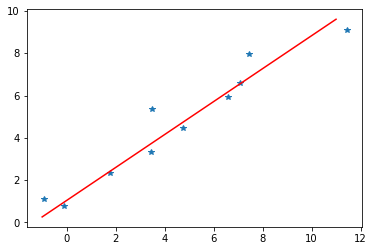

In [53]:
# after
x_test = np.linspace(-1, 11, 10)
y_pred = final_slope*x_test + final_intercept

plt.plot(x_data, y_label, '*')
plt.plot(x_test, y_pred, 'r')

## Saving & loading model

In [54]:
saver = tf.train.Saver()

In [55]:
with tf.Session() as sess:
    sess.run(init)

    training_steps = 100
    for i in range(training_steps):
        sess.run(train)

    print('Final Slope: ', sess.run(m))
    print('Final Intercept: ', sess.run(b))
    
    saver.save(sess, 'models/first_model.ckpt')

Final Slope:  0.7791916615803067
Final Intercept:  1.0418023810483423


In [56]:
with tf.Session() as sess:
    saver.restore(sess, 'models/first_model.ckpt')
    
    print('Final Slope: ', sess.run(m))
    print('Final Intercept: ', sess.run(b))

INFO:tensorflow:Restoring parameters from models/first_model.ckpt
Final Slope:  0.7791916615803067
Final Intercept:  1.0418023810483423
